In [23]:
import warnings
warnings.filterwarnings("ignore")

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

In [80]:
# Read the data from the CSV file
data = pd.read_csv('Wholesale customers data.csv')
column_names = data.columns.tolist()
print(column_names)

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [81]:
# Perform data normalization
scaler = StandardScaler()
X = data[data.columns[::]]
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Minimum number of samples in a cluster**

In [88]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import numpy as np

bandwidth_values = np.linspace(0.1, 20, num=10)
best_silhouette_score = -1
best_bandwidth = -1

for bandwidth in bandwidth_values:
    meanshift = MeanShift(bandwidth=bandwidth)
    labels = meanshift.fit_predict(X_scaled)

    # Check if multiple clusters are identified
    n_clusters = len(set(labels))
    if n_clusters > 1:
        silhouette_avg = silhouette_score(X_scaled, labels)
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_bandwidth = bandwidth

# Print the best bandwidth and corresponding silhouette score
print("Best bandwidth:", best_bandwidth)
print("Best Silhouette Score:", best_silhouette_score)


Best bandwidth: 6.7333333333333325
Best Silhouette Score: 0.8263511877226627


Number of clusters: 2
Silhouette Score: 0.8263511877226627


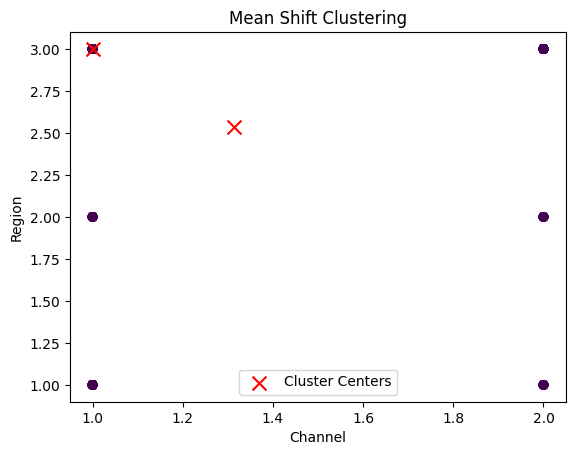

In [89]:
# Create the Mean Shift clustering model
bandwidth = 6.7333333333333325 # Bandwidth parameter
meanshift = MeanShift(bandwidth=bandwidth)

# Fit the model on the normalized data
meanshift.fit(X_scaled)

# Get the cluster labels for each data point
labels = meanshift.labels_

# Get the cluster centers in the original feature space
cluster_centers = scaler.inverse_transform(meanshift.cluster_centers_)

# Get the number of clusters
n_clusters = len(np.unique(labels))
print("Number of clusters:", n_clusters)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Plot a graph for analysis (example with two features)
feature1 = 'Channel' # Name of the first feature column
feature2 = 'Region' # Name of the second feature column

# Extract the values for plotting
x1 = X[feature1]
x2 = X[feature2]

# Plot the data points with their cluster labels
plt.scatter(x1, x2, c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Mean Shift Clustering")
plt.legend()
plt.show()